# Import Libraries and Load the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install rouge

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
import nltk
nltk.download('wordnet')
from nltk.translate.meteor_score import meteor_score

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_csv('filtered_df.csv')

In [ ]:
data

,ground_truth,llama,finetuned
0,"Well, based on what you're telling me, it soun...",Doctor: I see. Panic attacks can be very dist...,Doctor: It sounds like you may be experiencing...
1,It's possible that you have a vocal cord polyp...,"A: Hoarseness, or a raspy voice, can be caused...","Doctor: Based on your symptoms, it's possible ..."
2,"Okay, in that case, you will need to undergo a...",Can you tell me more about it?Certainly! Turne...,"Can you tell me more about it?Yes, of course. ..."
3,I'm sorry to hear that. We need to run a few t...,Doctor: Oh no! Ethylene glycol is a highly to...,Doctor: Oh no! Ethylene glycol is a very toxi...
4,"Based on your symptoms, we would need to perfo...","A lumbar puncture, also known as a spinal tap,...",Doctor: I'm sorry to hear that you're experien...
...,...,...,...
79,"Based on your symptoms, we need to run some te...",Doctor: I see. Gout is a type of arthritis tha...,Doctor: I see. Gout is a type of arthritis tha...
80,The first step is to seek mental health counse...,Unterscheidung between the two is important be...,Unterscheidung between medical and recreationa...
81,"For myelodysplastic syndrome, we usually recom...",Myelodysplastic syndrome (MDS) is a type of bl...,Myelodysplastic syndrome (MDS) is a type of ca...
82,It seems like you require wound care managemen...,"As a general rule, after surgery, it is import...","You: Doctor, I have an open wound from my surg..."


# Creat a Automatic Score Generation Function

In [ ]:
def Score_generator(a, b):
    score_bleu = sentence_bleu([a.split()], b.split())
    scores_rouge = rouge.get_scores(a, b)[0]
    score_meteor = meteor_score([a.split()], b.split())
    return pd.Series({
        'BLEU': score_bleu,
        'ROUGE-1 F': scores_rouge['rouge-1']['f'],
        'ROUGE-2 F': scores_rouge['rouge-2']['f'],
        'ROUGE-L F': scores_rouge['rouge-l']['f'],
        'METEOR': score_meteor
    })

# Generate Automatic Score for Each Comparison and Visualize

## PE_Chain of thoughts VS. Ground Truth

In [ ]:
# Initialize an empty list to store the scores
scores_list = []
rouge = Rouge()
# Loop through each row in the original DataFrame
for index, row in data.iterrows():
    # Apply the Score_generator function to each row
    score_row = Score_generator(row['llama'], row['ground_truth'])
    # Append the result to the list
    scores_list.append(score_row)

# Concatenate all the score Series into a single DataFrame
df_results = pd.DataFrame(scores_list)

# Now df_results contains all the scores for each row in the original DataFrame
print(df_results)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

             BLEU  ROUGE-1 F  ROUGE-2 F  ROUGE-L F    METEOR
0    7.339918e-79   0.188235   0.028037   0.164706  0.161148
1   2.877884e-155   0.129496   0.011111   0.115108  0.094414
2   1.493738e-155   0.141732   0.012658   0.125984  0.084945
3    1.134714e-78   0.244275   0.065574   0.244275  0.146055
4    2.150090e-02   0.220588   0.075269   0.205882  0.090651
..            ...        ...        ...        ...       ...
79   5.892904e-79   0.242857   0.052356   0.242857  0.134862
80  2.853935e-232   0.148760   0.000000   0.148760  0.076104
81   4.648369e-79   0.238095   0.068571   0.222222  0.119830
82  7.105933e-233   0.088496   0.000000   0.088496  0.040917
83   8.292519e-79   0.250000   0.061856   0.220588  0.176736

[84 rows x 5 columns]


In [ ]:
llama_score = df_results.mean()

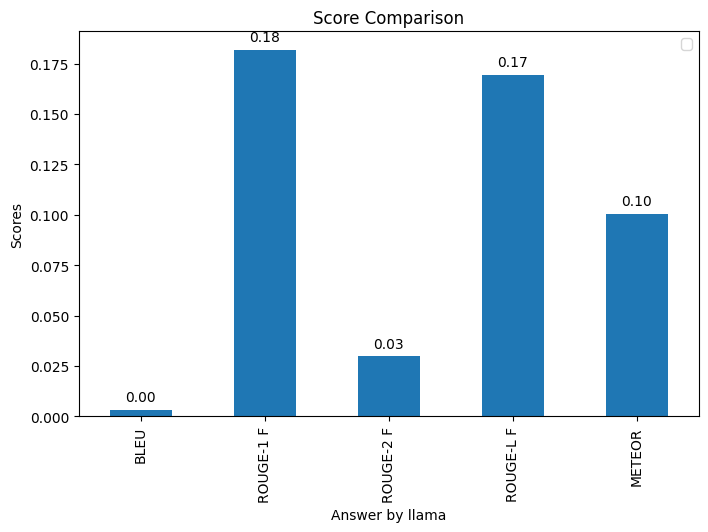

In [ ]:
ax = llama_score.plot(kind='bar', figsize=(8, 5))

# set title and labels
plt.title('Score Comparison')
plt.xlabel('Answer by llama')
plt.ylabel('Scores')

# show legend
plt.legend()

# loop to show the value of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# show the plot
plt.show()

## PE_Example VS. Ground Truth

In [ ]:
# Initialize an empty list to store the scores
scores_list = []

# Loop through each row in the original DataFrame
for index, row in data.iterrows():
    # Apply the Score_generator function to each row
    score_row = Score_generator(row['finetuned'], row['ground_truth'])
    # Append the result to the list
    scores_list.append(score_row)

# Concatenate all the score Series into a single DataFrame
df_results = pd.DataFrame(scores_list)

# Now df_results contains all the scores for each row in the original DataFrame
print(df_results)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

             BLEU  ROUGE-1 F  ROUGE-2 F  ROUGE-L F    METEOR
0    5.593296e-02   0.348387   0.094737   0.335484  0.240857
1    7.210801e-02   0.235294   0.097087   0.222222  0.184503
2    4.566059e-79   0.173913   0.023256   0.144928  0.098079
3    8.349185e-02   0.397059   0.142076   0.367647  0.260692
4    6.250046e-02   0.330435   0.200000   0.330435  0.105512
..            ...        ...        ...        ...       ...
79  5.295627e-232   0.158273   0.000000   0.158273  0.090984
80  6.667362e-156   0.181818   0.042105   0.181818  0.050179
81   2.059256e-02   0.217054   0.069364   0.217054  0.117519
82  4.631518e-233   0.171429   0.000000   0.114286  0.050578
83  2.732174e-155   0.208955   0.033708   0.179104  0.140781

[84 rows x 5 columns]


In [ ]:
df_results2 = df_results.mean()

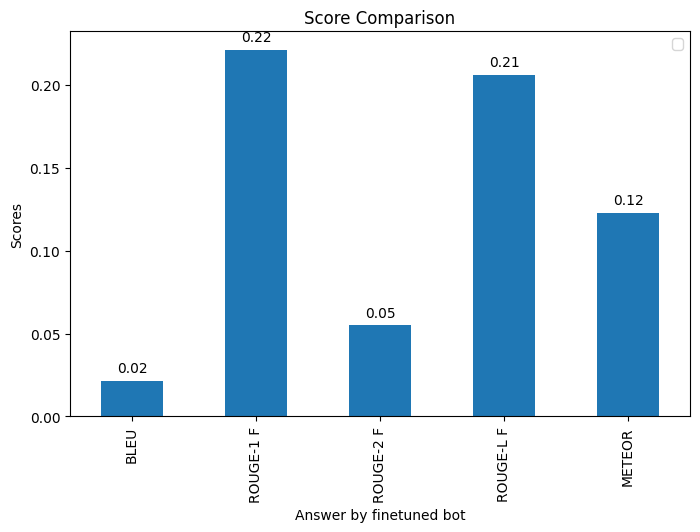

In [ ]:
ax = df_results2.plot(kind='bar', figsize=(8, 5))

# set title and labels
plt.title('Score Comparison')
plt.xlabel('Answer by finetuned bot')
plt.ylabel('Scores')

# show legend
plt.legend()

# loop to show the value of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# show the plot
plt.show()

In [ ]:
score = pd.DataFrame(llama_score, columns=['llama2'])
score['finetuned_chat_bot']=df_results2
score['difference'] = df_results2 - llama_score

In [ ]:
score['improve_ratio'] = (df_results2 - llama_score)/llama_score

In [ ]:
score

,llama2,finetuned_chat_bot,difference,improve_ratio
BLEU,0.003323,0.021565,0.018242,5.489933
ROUGE-1 F,0.181880,0.221066,0.039186,0.215447
ROUGE-2 F,0.029774,0.054887,0.025113,0.843476
ROUGE-L F,0.169580,0.206138,0.036559,0.215584
METEOR,0.100401,0.122681,0.022279,0.221902
